<a href="https://colab.research.google.com/github/JALVITO/CE888/blob/master/Labs/Lab_6/Lab_6_Task_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn import cluster, datasets, metrics
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
# Load data
df = pd.read_csv('https://raw.githubusercontent.com/sagihaider/CE888_2021/main/Lab_6/Data/Country-data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


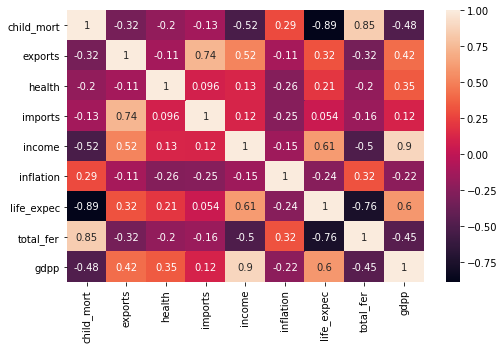

In [ ]:
# Plot correlation
plt.figure(figsize = (8, 5))
sns.heatmap(df.corr(), annot = True)
plt.savefig('corrplot')
plt.show()

A lot of correlated variables. Therefore, PCA will be used to reduce the problem dimensionality.

In [ ]:
# Transform and scale data
X = df.copy().drop(columns=['country'], axis=1)

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [ ]:
# Use Principal Component Analysis
pca = PCA()
X_train_pca = pca.fit_transform(X_std)

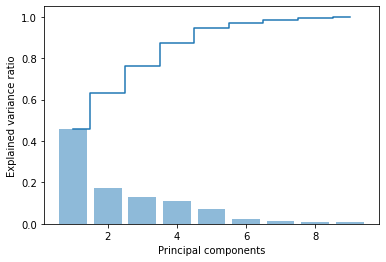

In [ ]:
# Plot cumulative explained variance
import matplotlib.pyplot as plt
plt.bar(range(1, 10), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 10), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

Even with just 4 component, +90% of the data variance is explained. This will be chosen for the final PCA.

In [ ]:
# Final PCA model
pca = PCA(n_components=4)
X_train_pca = pca.fit_transform(X_std)

In [ ]:
# Clustering into three classes
km = cluster.KMeans(n_clusters=3)
km.fit(X_train_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
# Append class predictions to original dataset and add 1 (because 1-indexed)
df['class'] = km.labels_
df['class'] += 1

In [ ]:
# Get summary statistics per class
df.groupby('class').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
class,,,,,,,,,
1,5.275000,60.765000,8.522000,54.352500,43267.500000,2.460125,79.542500,1.743500,39507.500000
2,92.633333,26.802063,6.125417,40.943040,3397.145833,12.072188,59.787500,4.905625,1624.583333
3,21.945570,39.849367,6.371139,46.725316,12270.886076,7.869570,72.548101,2.368354,6414.354430


In [ ]:
# Fix indexing
df['class'].replace(1, 4, inplace=True)
df['class'].replace(2, 5, inplace=True)
df['class'].replace(3, 6, inplace=True)
df['class'].replace(4, 3, inplace=True)
df['class'].replace(5, 1, inplace=True)
df['class'].replace(6, 2, inplace=True)

In [ ]:
# Get summary statistics per class
df.groupby('class').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
class,,,,,,,,,
1,92.633333,26.802063,6.125417,40.943040,3397.145833,12.072188,59.787500,4.905625,1624.583333
2,21.945570,39.849367,6.371139,46.725316,12270.886076,7.869570,72.548101,2.368354,6414.354430
3,5.275000,60.765000,8.522000,54.352500,43267.500000,2.460125,79.542500,1.743500,39507.500000


In [ ]:
# Under-developed
list(df[df['class'] == 1]['country'])

['Afghanistan',
 'Angola',
 'Benin',
 'Burkina Faso',
 'Burundi',
 'Cameroon',
 'Central African Republic',
 'Chad',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 "Cote d'Ivoire",
 'Equatorial Guinea',
 'Eritrea',
 'Gabon',
 'Gambia',
 'Ghana',
 'Guinea',
 'Guinea-Bissau',
 'Haiti',
 'India',
 'Kenya',
 'Kiribati',
 'Lao',
 'Lesotho',
 'Liberia',
 'Madagascar',
 'Malawi',
 'Mali',
 'Mauritania',
 'Mozambique',
 'Myanmar',
 'Nepal',
 'Niger',
 'Nigeria',
 'Pakistan',
 'Rwanda',
 'Senegal',
 'Sierra Leone',
 'South Africa',
 'Sudan',
 'Tajikistan',
 'Tanzania',
 'Timor-Leste',
 'Togo',
 'Uganda',
 'Yemen',
 'Zambia']

In [ ]:
# Developing
list(df[df['class'] == 2]['country'])

['Albania',
 'Algeria',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Azerbaijan',
 'Bahamas',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belize',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Bulgaria',
 'Cambodia',
 'Cape Verde',
 'Chile',
 'China',
 'Colombia',
 'Costa Rica',
 'Croatia',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Fiji',
 'Georgia',
 'Grenada',
 'Guatemala',
 'Guyana',
 'Indonesia',
 'Iran',
 'Iraq',
 'Jamaica',
 'Jordan',
 'Kazakhstan',
 'Kyrgyz Republic',
 'Latvia',
 'Lebanon',
 'Libya',
 'Macedonia, FYR',
 'Malaysia',
 'Maldives',
 'Mauritius',
 'Micronesia, Fed. Sts.',
 'Moldova',
 'Mongolia',
 'Montenegro',
 'Morocco',
 'Namibia',
 'Oman',
 'Panama',
 'Paraguay',
 'Peru',
 'Philippines',
 'Poland',
 'Romania',
 'Russia',
 'Samoa',
 'Saudi Arabia',
 'Serbia',
 'Solomon Islands',
 'Sri Lanka',
 'St. Vincent and the Grenadines',
 'Suriname',
 'Thailand',
 'Tonga',
 'Tunisia',
 'Turkey',
 'Turkmenistan',
 'Ukrai

In [ ]:
# Developed
list(df[df['class'] == 3]['country'])

['Australia',
 'Austria',
 'Bahrain',
 'Belgium',
 'Brunei',
 'Canada',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Estonia',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Hungary',
 'Iceland',
 'Ireland',
 'Israel',
 'Italy',
 'Japan',
 'Kuwait',
 'Lithuania',
 'Luxembourg',
 'Malta',
 'Netherlands',
 'New Zealand',
 'Norway',
 'Portugal',
 'Qatar',
 'Seychelles',
 'Singapore',
 'Slovak Republic',
 'Slovenia',
 'South Korea',
 'Spain',
 'Sweden',
 'Switzerland',
 'United Arab Emirates',
 'United Kingdom',
 'United States']